 <h1><center style="color:DodgerBlue;"> Lab 2 : AssurExperts </center> </h1>

 <h3><center style="color:DodgerBlue;"> Hayfa Allaoui<br>Aymen Bedoui<br>Skander Masmoudi<br>Nader Amri<br>Sofien Kanfir<br>Ahmed Ben Mohamed</center> </h3>
 

<h3 style="color:Lime;">  Problematic : </h3>     
This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data derived from zip area codes. The data was collected to answer the following question: Can you predict who would be interested in buying a caravan insurance policy and give an explanation why?


<h3 style="color:Lime;">  Business Objectives : </h3>

- identify the actual or potential customer from your dataset

- atribute a score to every client according to there sociodémographiques and Product property situation

<h3 style="color:Lime;">  Data Science goals : </h3>
    
We aim to identify our potentiel client using datavis then we dive more deeper by reducing our varibles to only the signficant ones and applay a model that help us atribute a socore to every client 


<h3 style="color:Lime;">  load library : </h3>

In [1]:
import pandas as pd
from plotly.offline import init_notebook_mode, iplot, plot,download_plotlyjs
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import HTML
from IPython.display import display
import random
import squarify
import lda
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import plotly.plotly as py
import colorlover as cl
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

%matplotlib inline  


<h3 style="color:Lime;">  Importing the dataset : </h3>

In [2]:
data = pd.read_table("AssurancExpertsInc.txt", sep="\t")
data_orgin = data
pd.set_option('display.max_columns', 500)
data.head()


SD1  SD2  SD3  SD4  SD5  SD6  SD7  SD8  SD9  SD10  SD11  SD12  SD13  SD14  \
0   33    1    3    2    8    0    5    1    3     7     0     2     1     2   
1   37    1    2    2    8    1    4    1    4     6     2     2     0     4   
2   37    1    2    2    8    0    4    2    4     3     2     4     4     4   
3    9    1    3    3    3    2    3    2    4     5     2     2     2     3   
4   40    1    4    2   10    1    4    1    4     7     1     2     2     4   

   SD15  SD16  SD17  SD18  SD19  SD20  SD21  SD22  SD23  SD24  SD25  SD26  \
0     6     1     2     7     1     0     1     2     5     2     1     1   
1     5     0     5     4     0     0     0     5     0     4     0     2   
2     2     0     5     4     0     0     0     7     0     2     0     5   
3     4     3     4     2     4     0     0     3     1     2     3     2   
4     4     5     4     0     0     5     4     0     0     0     9     0   

   SD27  SD28  SD29  SD30  SD31  SD32  SD33  SD34  SD35  SD36  SD37  SD38  \
0     2     6     1     1     8     8     0     1     8     1     0     4   
1     3     5     0     2     7     7     1     2     6     3     2     0   
2     0     4     0     7     2     7     0     2     9     0     4     5   
3     1     4     0     5     4     9     0     0     7     2     1     5   
4     0     0     0     4     5     6     2     1     5     4     0     0   

   SD39  SD40  SD41  SD42  SD43  PO44  PO45  PO46  PO47  PO48  PO49  PO50  \
0     5     0     0     4     3     0     0     0     6     0     0     0   
1     5     2     0     5     4     2     0     0     0     0     0     0   
2     0     0     0     3     4     2     0     0     6     0     0     0   
3     3     0     0     4     4     0     0     0     6     0     0     0   
4     9     0     0     6     3     0     0     0     0     0     0     0   

   PO51  PO52  PO53  PO54  PO55  PO56  PO57  PO58  PO59  PO60  PO61  PO62  \
0     0     0     0     0     0     0     0     0     5     0     0     0   
1     0     0     0     0     0     0     0     0     2     0     0     0   
2     0     0     0     0     0     0     0     0     2     0     0     0   
3     0     0     0     0     0     0     0     0     2     0     0     0   
4     0     0     0     0     0     0     0     0     6     0     0     0   

   PO63  PO64  PO65  PO66  PO67  PO68  PO69  PO70  PO71  PO72  PO73  PO74  \
0     0     0     0     0     0     1     0     0     0     0     0     0   
1     0     0     2     0     0     0     0     0     0     0     0     0   
2     0     0     1     0     0     1     0     0     0     0     0     0   
3     0     0     0     0     0     1     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   PO75  PO76  PO77  PO78  PO79  PO80  PO81  PO82  PO83  PO84  PO85 CLASS  \
0     0     0     0     0     0     1     0     0     0     0     0    No   
1     0     0     0     0     0     1     0     0     0     0     0    No   
2     0     0     0     0     0     1     0     0     0     0     0    No   
3     0     0     0     0     0     1     0     0     0     0     0    No   
4     0     0     0     0     0     1     0     0     0     0     0    No   

     STATUS  
0  Learning  
1  Learning  
2  Learning  
3  Learning  
4  Learning

<h3 style="color:Lime;"> Data Visualsation : </h3> 

<h3 style="color:Lime;">  Yes rate : </h3> 

In [3]:
labels = data.CLASS.unique()
values = [data.CLASS[data.CLASS == i].count() for i in data.CLASS.unique()]

trace = go.Pie(labels=labels, values=values)
layout = go.Layout(
    title='Caravan intreset rate'
)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig,filename='jupyter-table1')

the insurance have 9822 cutomer the number of customer that said yes to caravan policy is signefcly lower then those who said yes ( 586 vs 9320 ) only 5.97% from this point we know that our data set is imbalce and we have to keep that in mid in our futre use and try to fix that ( smote .. )

<h3 style="color:Lime;">  Age / YES : </h3> 

In [4]:
labels = ['20-30 years','30-40 years','40-50 years','50-60 years','60-70 years','70-80 years']
values = data.groupby([data.CLASS[data.CLASS == "Yes"],data.SD4]).size().tolist()

#texinfo to change the % to the number 
#hoverinfo to make some info when the mouse is over 
trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(line=dict(color='black', width=1)))
layout = go.Layout(
    title ='client who said "YES" by tranche age'
)
fig = go.Figure(data=[trace], layout=layout)

iplot(fig, filename='styled_pie_chart')

Most of our client that said yes to the offer are aged between __30-50 __
<h3 style="color:Lime;"> Children :  </h3> 

In [5]:
fig = {
  "data": [
    {
      "values": data.groupby([data.CLASS[data.CLASS == "Yes"],data.SD14]).size().tolist(),
      "labels": ['0%','1 - 10%','11 - 23%','24 - 36%','37 - 49%','50 - 62%','63 - 75%','76 - 88%','89 - 99%','100%'],
      "domain": {"x": [0, .48]},
      "name": "without children",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },   
    {
      "values": data.groupby([data.CLASS[data.CLASS == "Yes"],data.SD15]).size().tolist(),
      "labels":['0%','1 - 10%','11 - 23%','24 - 36%','37 - 49%','50 - 62%','63 - 75%','76 - 88%','89 - 99%','100%'],
      "domain": {"x": [.52, 1]},
      "name": "with children",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }
  ],
  "layout": {
        "title":" effect of child presence on the choice in a community",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "No children",
                "x": 0.17,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "children",
                "x": 0.81,
                "y": 0.5
            }               
        ]
    }
}
iplot(fig, filename='donut')

<h3 style="color:Lime;"> Class :  </h3> 
    

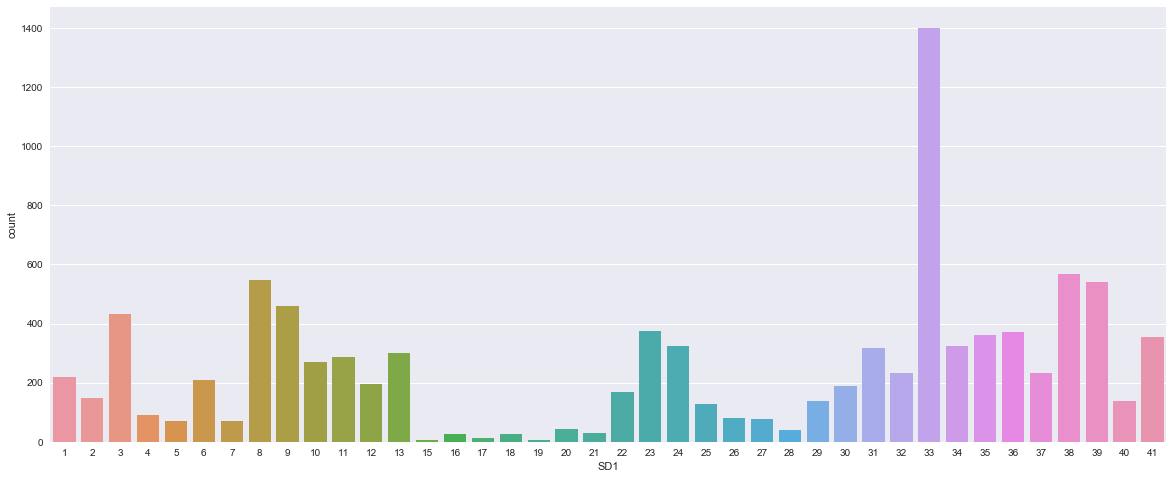

In [6]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
ax = sns.countplot(x='SD1', data=data)

- Lower class large families is the most exsisting colom in our dataset 

- those fallowing classes are alomost none exisnt in our dataset :

	- Senior cosmopolitans
	- Students in apartments
	- Fresh masters in the city
    - Single youth
	- Suburban youth
	- Etnically diverse
	- Young urban have-nots

In [7]:
data_copy=data
values_yes = data_copy.groupby([data_copy.CLASS[data.CLASS == "Yes"],data_copy.SD1]).size().tolist()
values_no = data_copy.groupby([data_copy.CLASS[data.CLASS == "No"],data_copy.SD1]).size().tolist()

In [8]:

trace1 = go.Bar(
    x=data_copy.SD1,
    y=values_yes,
    name='Yes'
)
trace2 = go.Bar(
    x=data_copy.SD1,
    y=values_no,
    name='No'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

although __13 (Young all american family)__ have al lower number of contract it have the highst rate of yes / no rate among all the contrats __ 80 yes  and 346 no __

<h3 style="color:Lime;"> Customer main type : </h3>

There is 10 types of client : 

- Successful hedonists

- Driven Growers

- Average Family

- Career Loners

- Living well

- Cruising Seniors

- Retired and Religeous

- Family with grown ups

- Conservative families

- Farmers

Lets study them for a bit


In [9]:
labels = ['Successful hedonists','Driven Growers','Average Family','Career Loners','Living well','Cruising Seniors','Retired and Religeous','Family with grown ups','Conservative families','Farmers']
values = data_copy.groupby([data_copy.SD5]).size().tolist()

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', 
               textfont=dict(size=20),
               marker=dict(line=dict(color='black', width=1)))
layout = go.Layout(
    title ='client Main Class'
)
fig = go.Figure(data=[trace], layout=layout)

iplot(fig, filename='styled_pie_chart')

**Familly with gronups ** are the most frequantes client for this company 
**Career Loners** rate is considrebly low so it is safe to say that our market is not based on carrer loaner but rather on the famillys more then the individuals

__Car ownership :__

SD 32 , 33 and 34 can tell us some valiable info about the rate of car ownership in the cumunity of the clients the infromation is given to us in the shape of ranges :
- community own  0%
- community own 1 - 10%
- community own 11 - 23%
- community own 24 - 36%
- community own 37 - 49%
- community own 50 - 62%
- community own 63 - 75%
- community own 76 - 88%
- community own 89 - 99%
- community own 100%

<h3 style="color:Lime;"> At least one car : </h3> 

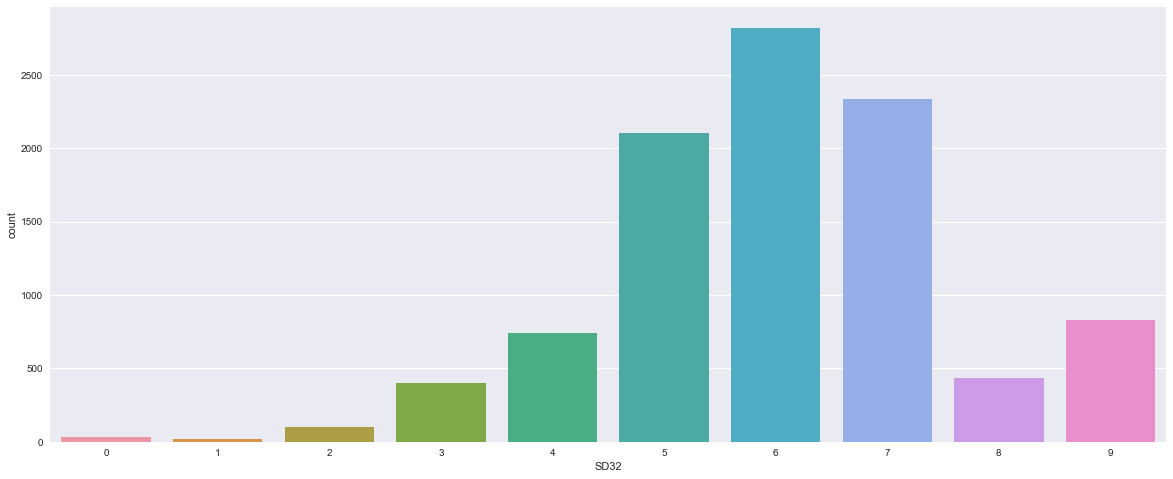

In [10]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
ax = sns.countplot(x='SD32', data=data_copy)

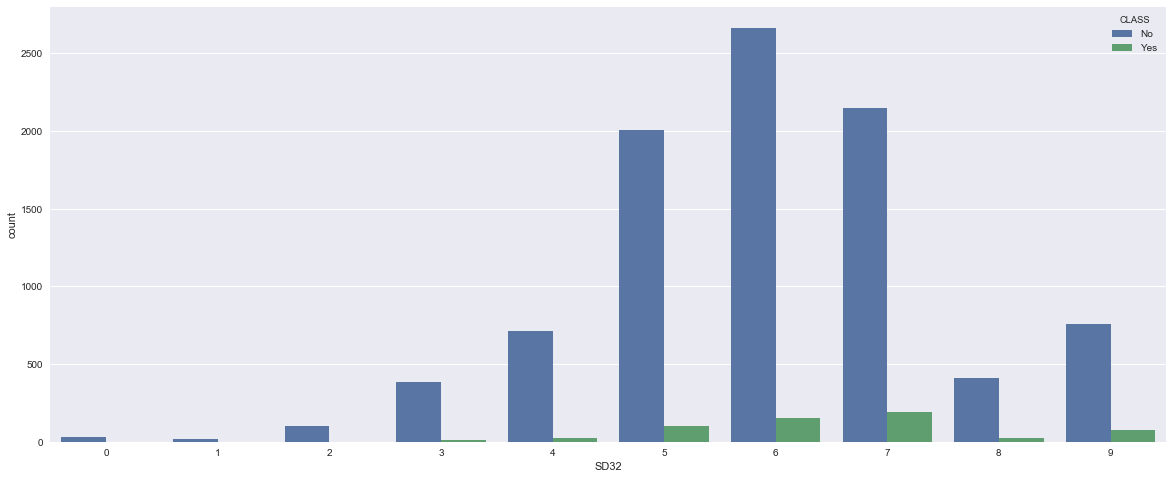

In [11]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
ax = sns.countplot(x='SD32', data=data_copy,hue='CLASS')

<h3 style="color:Lime;"> No cars : </h3>

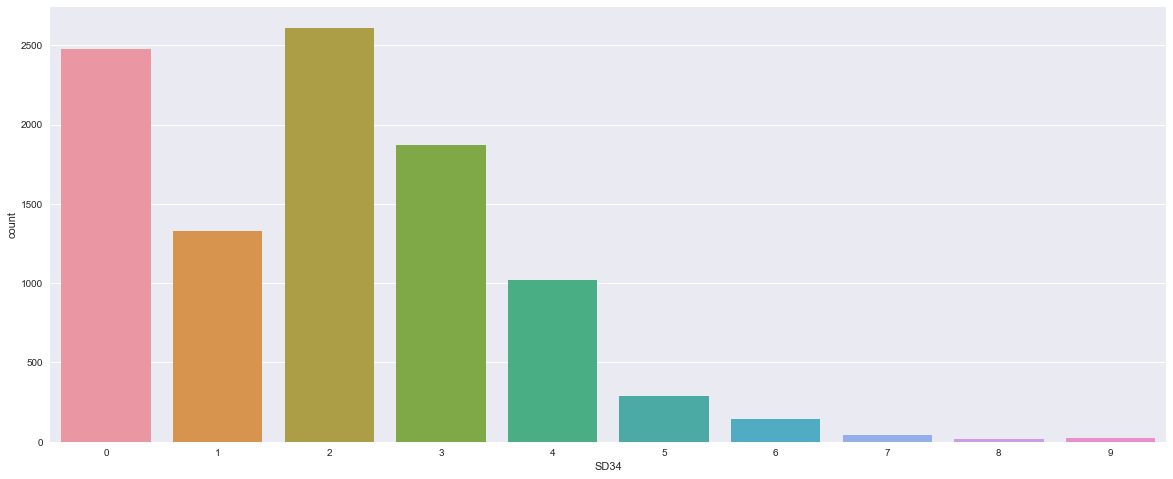

In [12]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
ax = sns.countplot(x='SD34', data=data_copy)

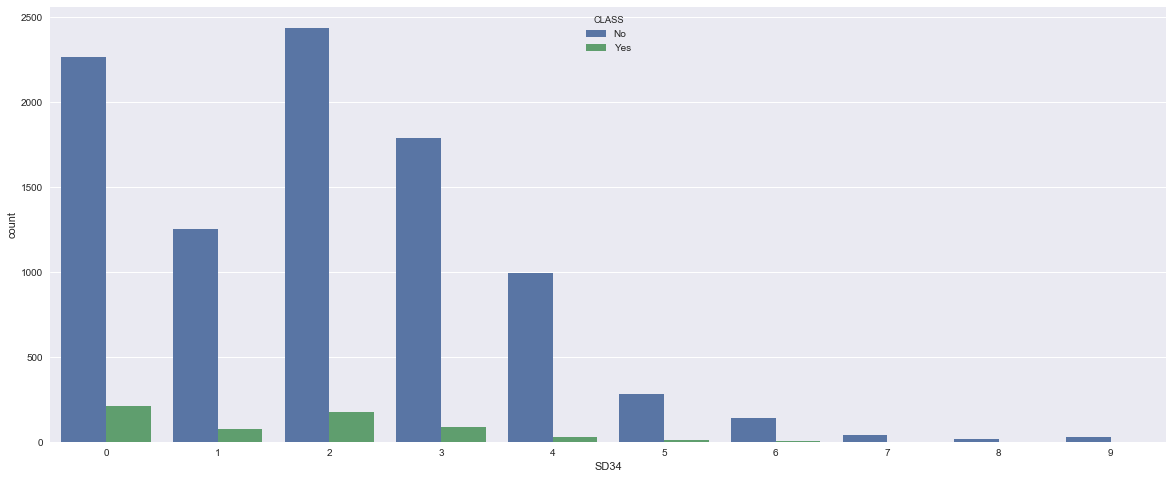

In [13]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
ax = sns.countplot(x='SD34', data=data_copy,hue='CLASS')

As we can see from the last two graph apperantly car ownership has an effect on the caravan respance ( if the client lives in a community that deosnt have cars his answer is no but if he lives in a cummunty that have cars rate over **37%** the yes answer rate start to rise  the same interpritation for the no car cummunity if our client lives in a cummunity with higher % of no car ownership he is **more likly to to say no to our offer** 

<h3 style="color:Lime;">  Houses : </h3>

we will visualse  the number of houses and family number for our client to get a surface view on  House Assurance (30 MHHUUR Rented house ,31 MHKOOP Home owners)

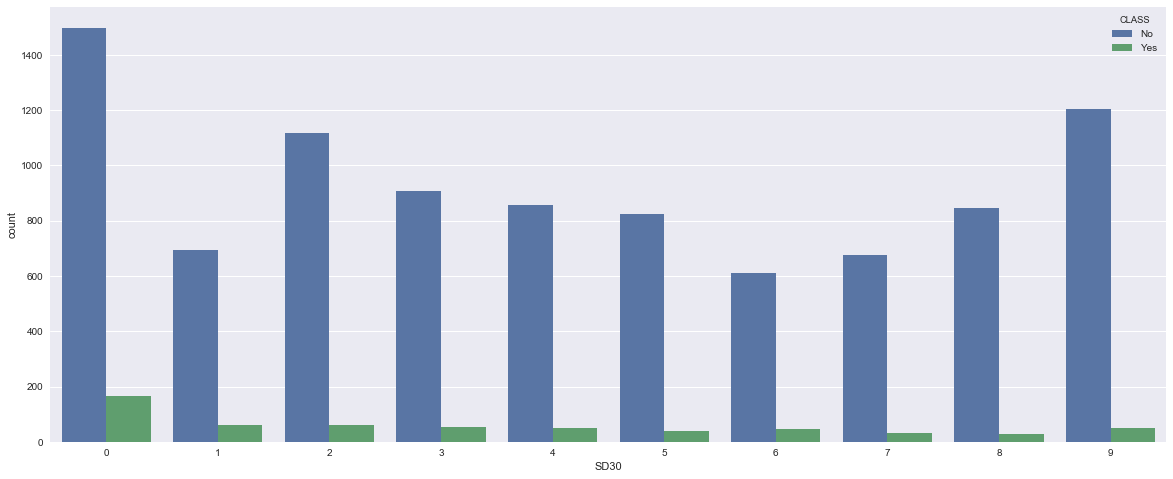

In [14]:
# rent a house
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
ax = sns.countplot(x='SD30', data=data_copy,hue='CLASS')

<h3 style="color:Lime;">  Own A house </h3>

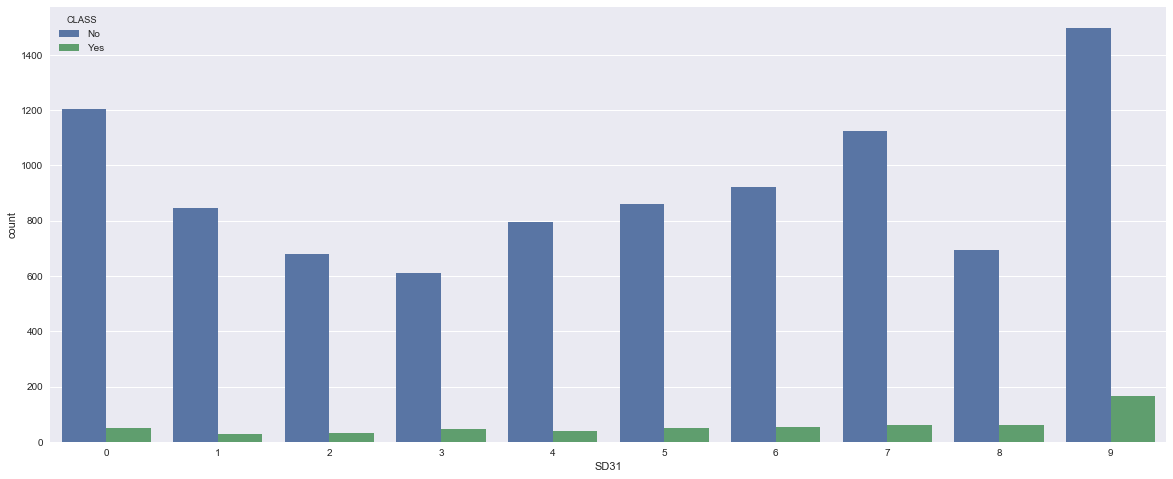

In [15]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
ax = sns.countplot(x='SD31', data=data_copy,hue='CLASS') 


as we see here if the client own a house he is more likely the enroll in the new contract from which is logical because if he own a house that mean taht he can afford a caravan and its insurance 
<h3 style="color:Lime;">  Income : </h3>

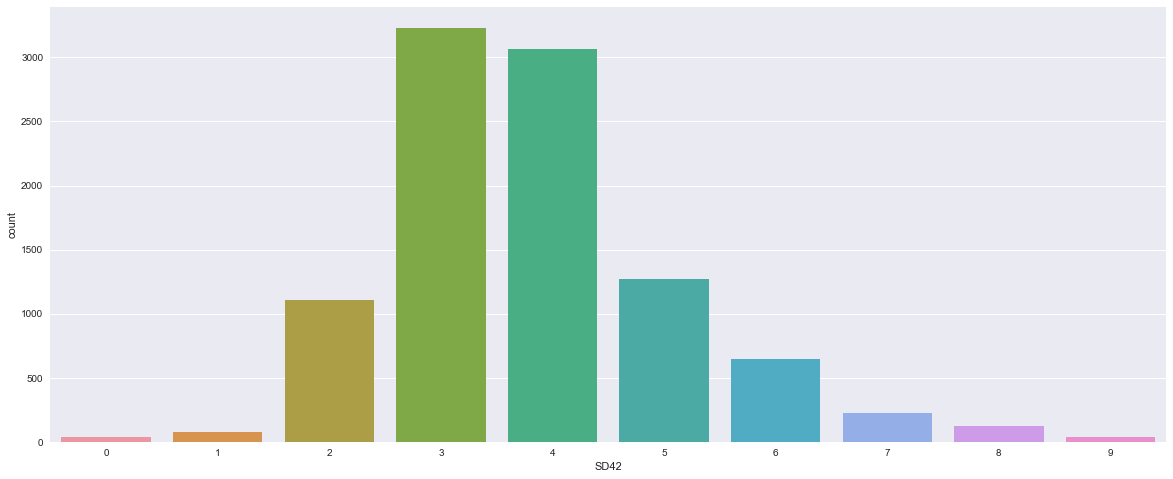

In [16]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
ax = sns.countplot(x='SD42', data=data_copy)

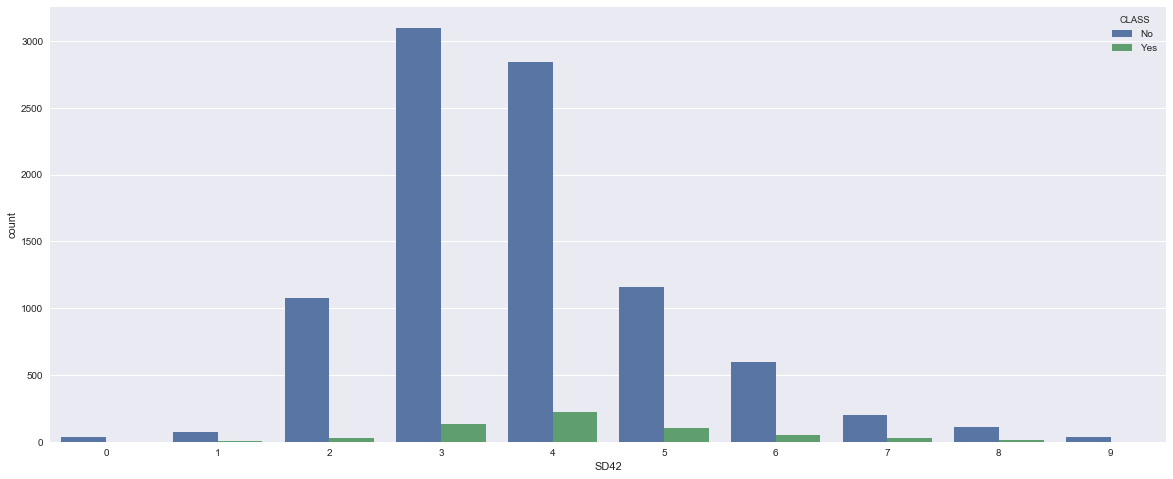

In [17]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
ax = sns.countplot(x='SD42', data=data_copy,hue='CLASS') 

Most of the client are between 3 __(100 – 199) and 4 (200 – 499)__ plus the answer varies according to the client class 

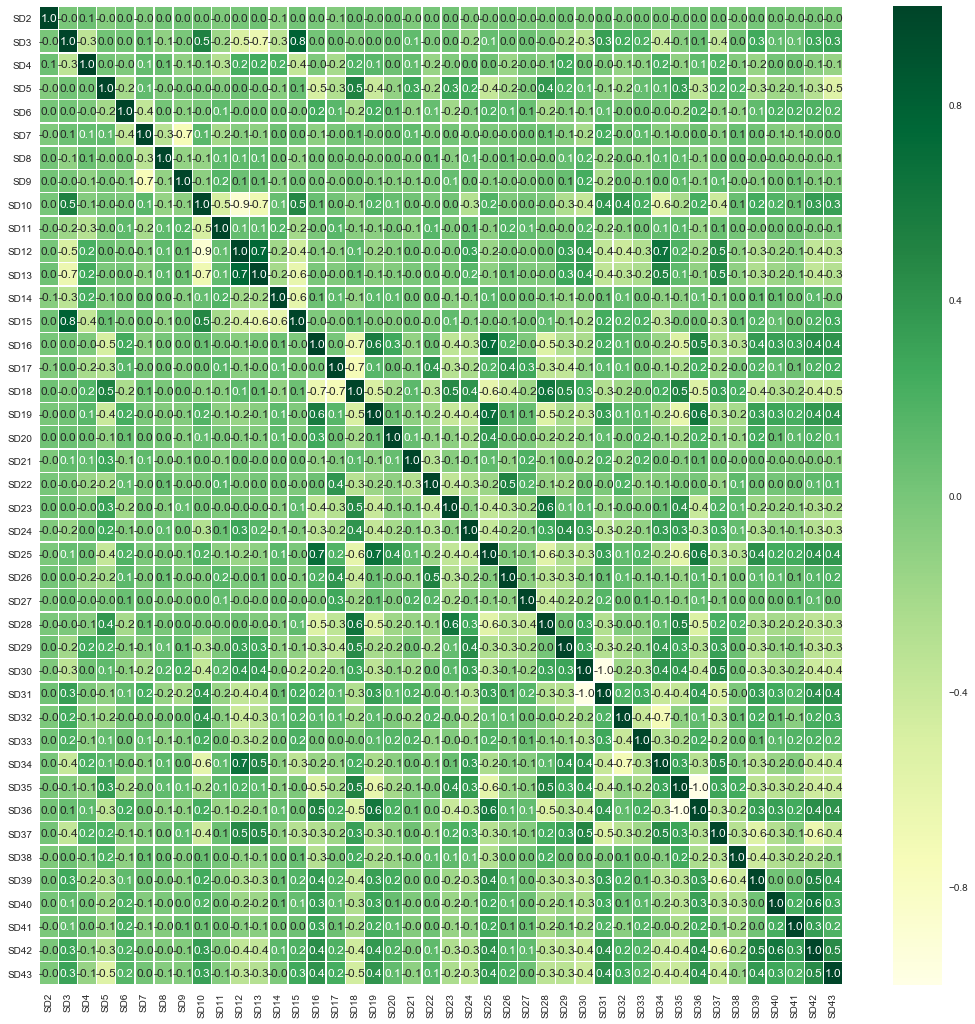

In [18]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_copy[data_copy.columns[1:43]].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="YlGn")

There is almost no __Positive Coralation __ between the atttribute Demographics :
- Positive Coralation between SD7 __(protestant)__ with SD9 __( no relegion)__
- SD3 __(size household 1 – 6)__ with SD15 __(Household with children)__ 

There is a negative corolation between :
- SD10 __(married)__ and SD12 __(No relation)__
- SD30 __(own a house) and SD31 __(renting a house )__
- SD35 __(National Health Service)__ and SD36 __(Private Health Service)__



<h3 style="color:Lime;">  PO76 : Number of life insurances : </h3>
    
This colom tell us the number of health contract in a cummunity here is  the legned 

- 0 f 0

- 1 f 1 – 49

- 2 f 50 – 99

- 3 f 100 – 199

- 4 f 200 – 499

- 5 f 500 – 999

- 6 f 1000 – 4999

- 7 f 5000 – 9999

- 8 f 10.000 - 19.999

- 9 f 20.000 - ?

 


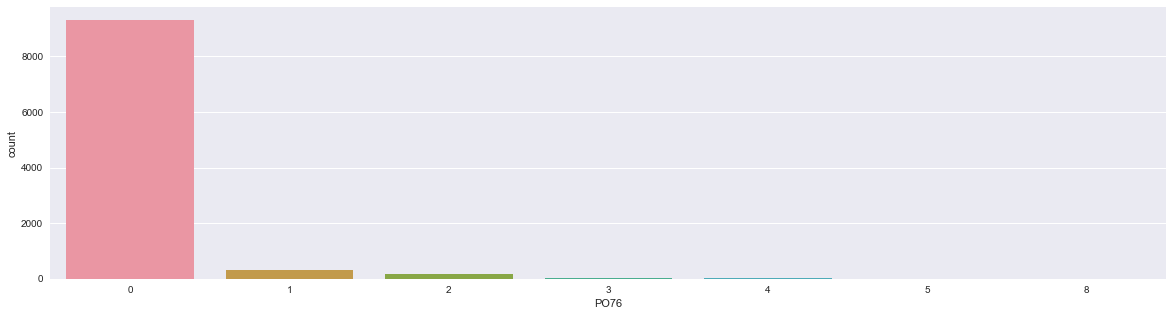

In [19]:
plt.figure(figsize=(20,5)) 
sns.set(style="darkgrid")
ax = sns.countplot(x='PO76', data=data_copy)

As we can see most of our client are not intressted the life assurace only about __500__ client lives in a cummunites where the number of contract range from __1 to 99 life assurace  __

In [20]:
data_orig = pd.read_table("AssurancExpertsInc.txt", sep="\t")
data = pd.read_table("AssurancExpertsInc.txt", sep="\t")
box0 = go.Box(
    y=data['PO44'],
    name='private third party insurance'
)
box1 = go.Box(
    y=data['PO45'], 
    name='third party insurance (firms)'
)
box2 = go.Box(
    y=data['PO46'],
    name='third party insurane (agriculture)'
)
box3 = go.Box(
    y=data['PO47'],
    name='car policies'
)
box4 = go.Box(
    y=data['PO48'],
    name='delivery van policies'
)
box5 = go.Box(
    y=data['PO49'],
    name='motorcycle/scooter policies'
)

box6 = go.Box(
    y=data['PO51'],
    name='trailer policies'
)
box7 = go.Box(
    y=data['PO52'],
    name='tractor policies'
)
box8 = go.Box(
    y=data['PO53'],
    name='agricultural machines policies'
)
box9 = go.Box(
    y=data['PO57'],
    name='family accidents insurance policies'
)
box10 = go.Box(
    y=data['PO58'],
    name='disability insurance policies'
)
box11 = go.Box(
    y=data['PO59'],
    name='fire policies'
)
box12 = go.Box(
    y=data['PO61'],
    name='boat policies'
)
box13 = go.Box(
    y=data['PO62'],
    name='bicycle policies'
)
box14 = go.Box(
    y=data['PO63'],
    name='property insurance policies'
)
box15 = go.Box(
    y=data['PO64'],
    name='social security insurance policies'
)

layout = go.Layout(
    title='A quick look on the most popular type of contracts '
)

boxes = [box0,box1,box2,box3,box4,box5,box6,box7,box8,box9,box10,box11,box12,box13,box14,box15 ]
fig = go.Figure(data=boxes, layout=layout)
iplot(fig)

As we can see our clients have a <span style="color:red">HIGH</span>  intrest rate in the __car policy__ which is a good news for our caravan policy additionally it looks like our client are intressted in __ fire and privite third party insurance  but for all the othes policies they are almost none exsistant around the board ! 

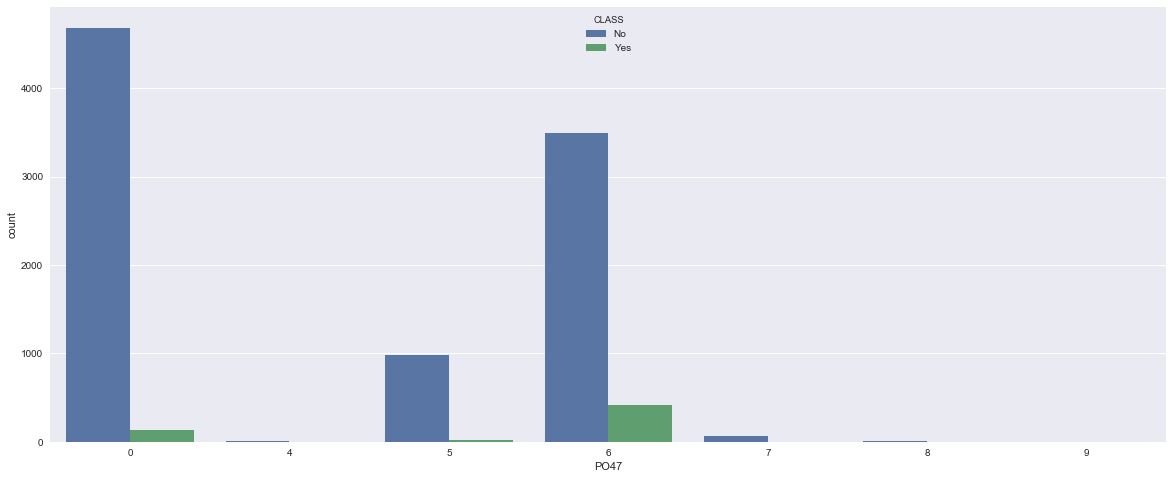

In [21]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
ax = sns.countplot(x='PO47', data=data,hue='CLASS')

In [22]:
yes=[data_orig.CLASS[data_orig.CLASS == "Yes"].count()]
yescar=[ data_orig.groupby([data_orig.CLASS[data_orig.CLASS == "Yes"],data_orig.PO68[data_orig.PO68>0]]).size().sum()]
print(yes)
yescar


[586]


[448]

In [23]:
x = ['The yes diffrance']
y = [586]
y2 = [448]

All_yes = go.Bar(
    x=x,
    y=y,
    text=y,
    name='Yes',
    textposition = 'auto',
    marker=dict(
        color='rgb(255, 140, 102)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

Yes_with_car = go.Bar(
    x=x,
    y=y2,
    text=y2,
    name='Yes + Car',
    textposition = 'auto',
    marker=dict(
        color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

data = [All_yes,Yes_with_car]

iplot(data)

SD30 ( rent a house ) : 

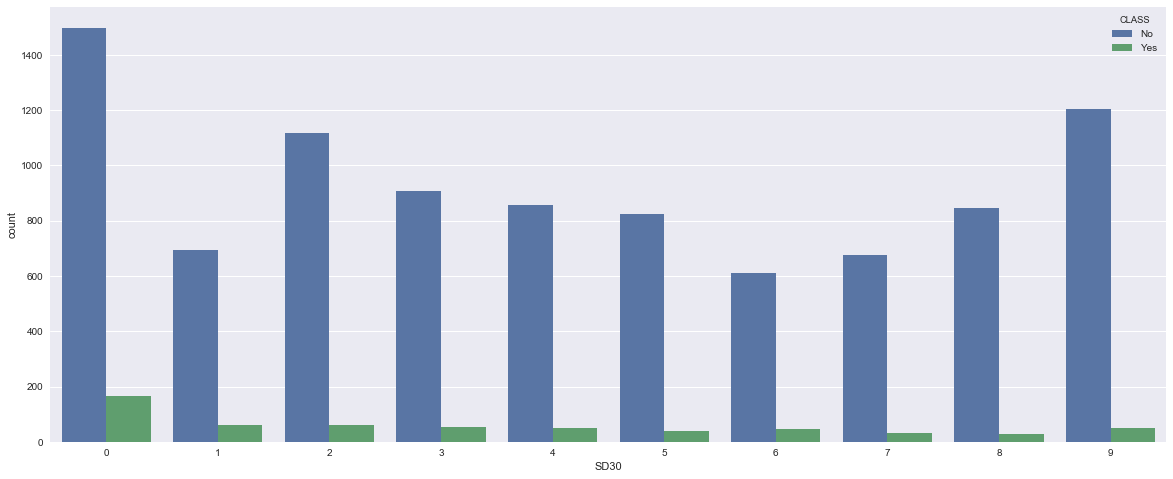

In [24]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
ax = sns.countplot(x='SD30', data=data_orgin,hue='CLASS')

The number of car contract have a __high infulance on the disstion of the client __ 

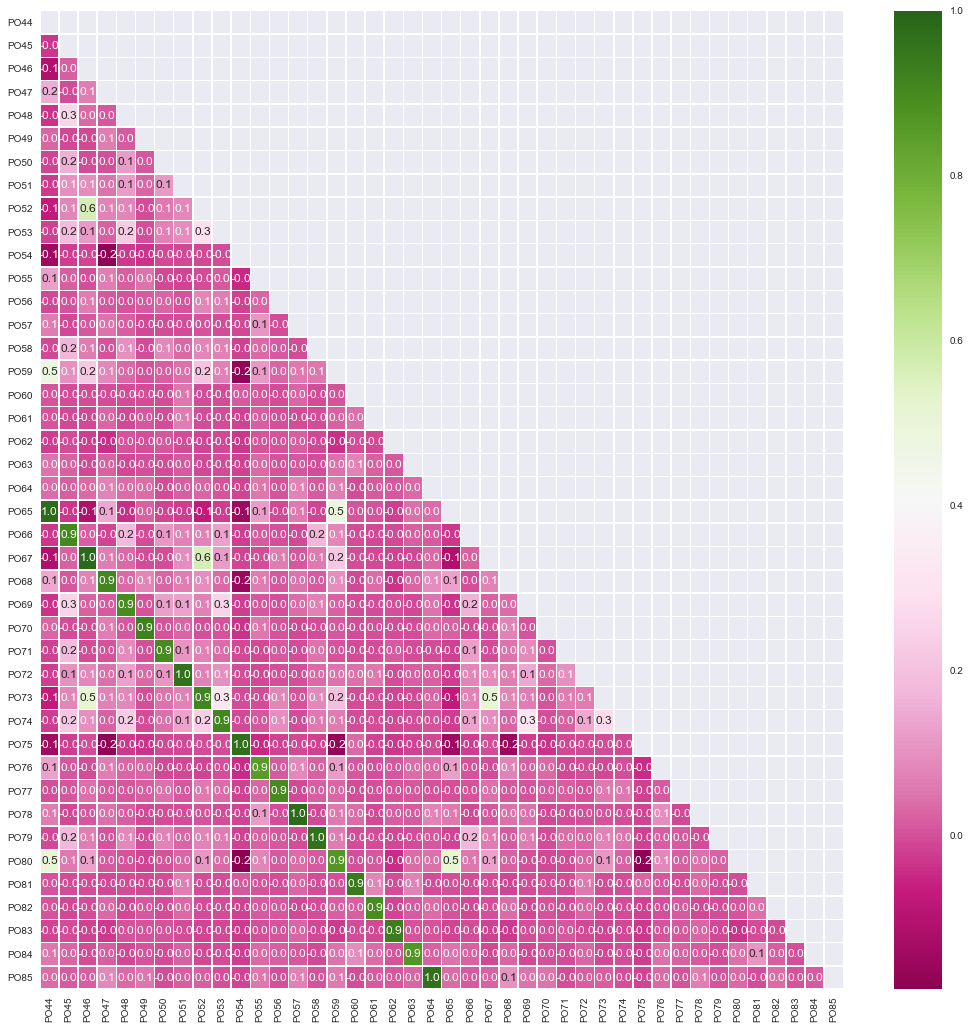

In [25]:
f,ax = plt.subplots(figsize=(18, 18))
corr = data_orgin[data_orgin.columns[43:85]].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="PiYG")

Strong coorélation + between 
- PO44-PO65
- PO45-PO66
....
- PO64-PO85

this is obvious for the soul reason that the first row is about the contrubtion on the contract and the second row is the nomber 
of contracts 

<h3 style="color:Orange;">  The profil of client who said yes to the caravan policy :</h3>
- age : 30-50 years (78%) but 20-30 and 70-80 are not intressted at all ( 0.1% )
-  number of houses : the client who said yes most of them own 3 houses ( 89,9% own one home ) , there is a minorty of client that have more then 3 homes and intrested 
- customer main type : familly with gownups and avrage fammily are more intressted then other type of customer 
- More likely to be married and do have children
- Medium level education 
- They do have a car and also a car policy
- home renters are more keen on caravans and that is understandable due to the lack of stability of home renters. Home owners tend to be more wealthy thus to work more and have less time for leasure and have less will to move with a caravan.	

Text(0.5,1,'PCA result')

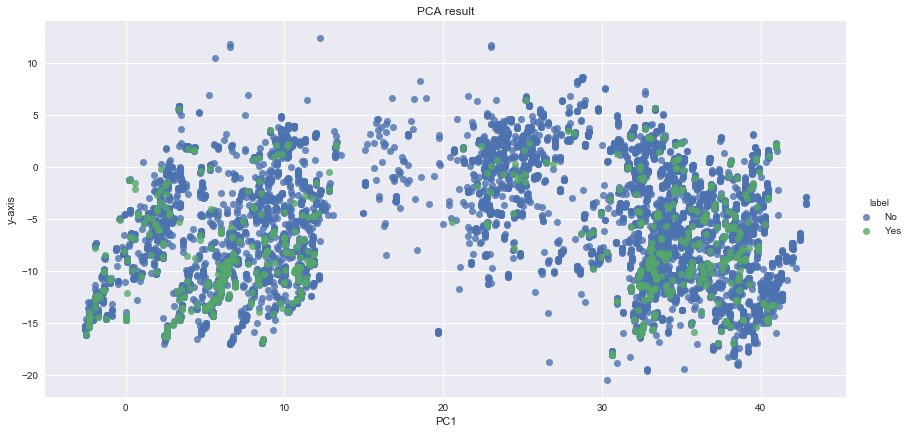

In [26]:
plt.rcParams['figure.figsize'] = [10, 18]
Y = data_orgin.CLASS
x = data_orgin.iloc[:,0:85]
features = x.T 
covariance_matrix = np.cov(features)
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

eig_vals[0] / sum(eig_vals)
projected_X = x.dot(eig_vecs.T[0])
projected_Y = x.dot(eig_vecs.T[1])
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = pd.DataFrame(projected_Y, columns=['PC1'])
result['label'] = Y
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label",size=6, aspect=2,) # color

# title
plt.title('PCA result')



<p style="font-size:20px;color:Orange;">the profile of our target customer isn't of the clients who said yes ! : </p>
from this plot we can gather that the client who said yes are very similier to the ones who said no so it is hard o distinguish ( between two client whom have the same profile one can say yes but the  other say no ), so the profiling that we did before __wont give us a  true result__ because as we see some client said no but they are willing to participate

<h3 style="color:Lime;">  Modeling  : </h3>  


<h4 style="color:Orange;"> Feature selection : </h4>

In [27]:
# to change the yes/no to 0 and 1
# after lamda we cann applay function on a coloms 
data_orgin['CLASS'] = data_orgin['CLASS'].apply(lambda CLASS: 1 if CLASS == "Yes" else 0)
# to change the type 
data_orgin['CLASS'] = data_orgin['CLASS'].astype(int)
X = data_orgin.loc[:,'SD1':'PO85'] 
Y = data_orgin['CLASS']


In [28]:
X = data_orgin.loc[:,'SD1':'PO85'] 
Y = data_orgin['CLASS']
X_copy = X


<h4 style="color:Orange;">  Train/Test Split : </h4>

determines the relationship between each feature and output (target) only the features with highest confidence are selected SelectKBest - selecting K number of features SelectPercentile - selection is made based on a percentage of the original feature

In [29]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.70, random_state=1)

print(data_orgin.shape)
print(X.shape)

(9822, 87)
(9822, 85)


<h4 style="color:Orange;">  __Optimal number of features :__</h4>

this is an univrairnte methode it will look to the out come and it realtion with the features and select the k number of the best features 

In [30]:
# Such a large set of features can cause overfitting and also slow computing
# Use feature selection to select the most important features
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest()
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [31]:
print(colnames_selected)

['SD34', 'SD37', 'SD43', 'PO44', 'PO47', 'PO59', 'PO61', 'PO65', 'PO68', 'PO82']


The model has default number of feature equal to __10__ lets try to see the optimal number of features

Optimal number of features : 6


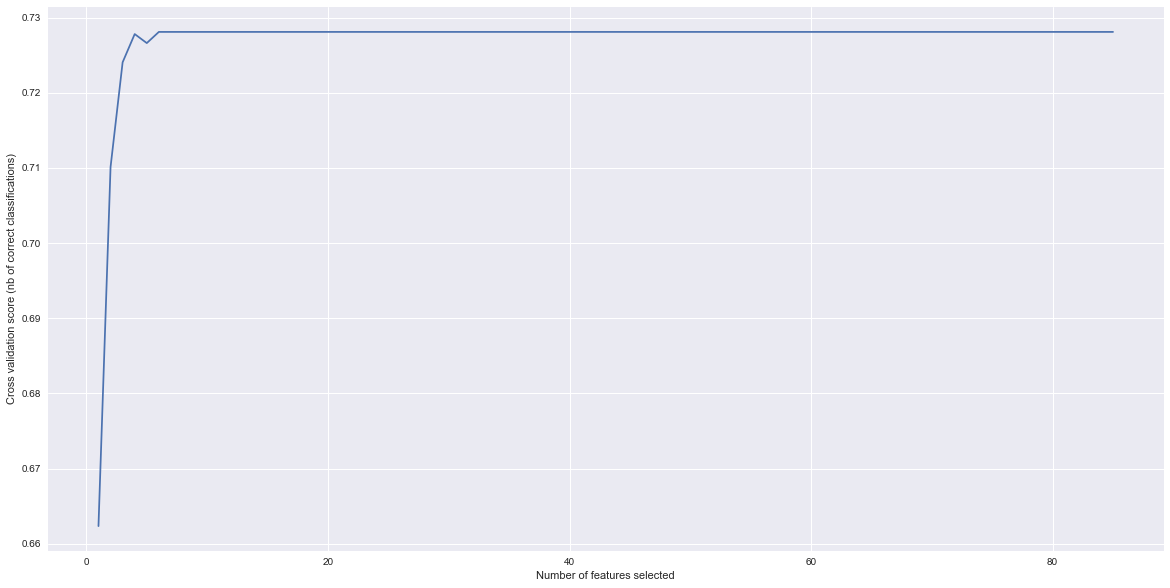

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10, max_leaf_nodes=None, min_impurity_decrease=0, min_impurity_split=None, min_samples_leaf=0.1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best')

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=dt, step=1, cv=StratifiedKFold(4),
              scoring='roc_auc', verbose = 0)
rfecv.fit(X,Y)

# print(rfecv.ranking_)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

X_new = rfecv.fit_transform(X, Y)

The optimal number of features is __6 __ so lets applay the feature selection 

In [33]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=6)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]
print("the selected features are : ")
print(colnames_selected)

the selected features are : 
['SD43', 'PO44', 'PO47', 'PO59', 'PO68', 'PO82']


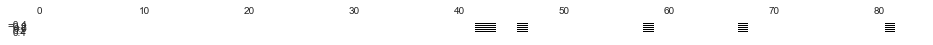

In [34]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

__Lets pass logictic regressin model on our new coloms __

In [35]:
# Function to build model and find model performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    return auc



In [36]:
# Find performance of model using preprocessed data
auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print(auc_processed)

0.7252388296277257


In [37]:
np.random.seed(500)
clf_RF = RandomForestClassifier(n_estimators=3)
clf_RF.fit(X_train_selected, y_train)
print("Random Forest Classifier Dataframe Test score :")
print(clf_RF.score(X_test_selected,y_test))

Random Forest Classifier Dataframe Test score :
0.9324737020699015


In [38]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 2761, 1: 186}

On our test set we have __2761 No and 186 Yes__

In [39]:
RF_y_pred_class = clf_RF.predict(X_test_selected)
confusion_matrix(y_test, RF_y_pred_class)

array([[2740,   21],
       [ 178,    8]], dtype=int64)

Our confusion matrix didnt give us a good result but we have to **keep in mind that not all the client that said yes are willing to applay for the caravan insurance **

In [40]:
model = LogisticRegression()
model.fit(X_train_selected, y_train)


model.predict_proba(X_train_selected)

array([[0.95391796, 0.04608204],
       [0.98745689, 0.01254311],
       [0.95491409, 0.04508591],
       ...,
       [0.98511603, 0.01488397],
       [0.95391796, 0.04608204],
       [0.88517041, 0.11482959]])

This array contain the percentage of change that the Client  will apply  for our policy or not 
in the next step we will only  select the coloms that Kbest gave us

In [41]:
X_copy=X[colnames_selected]

In [42]:
X_copy.head()

SD43  PO44  PO47  PO59  PO68  PO82
0     3     0     6     5     1     0
1     4     2     0     2     0     0
2     4     2     6     2     1     0
3     4     0     6     2     1     0
4     3     0     0     6     0     0

We ll add a score according the probabilty chance to say yes ( the scoring will be with the logistic regression model ) 

In [43]:
ScData = pd.DataFrame(data=X_copy)
z =model.predict_proba(X_copy)[:, 1]
RFy_pred_prob = z
RFscoring = RFy_pred_prob
ScData['Score'] = RFscoring
Data_logstic = ScData

In [44]:
ScData.head()

SD43  PO44  PO47  PO59  PO68  PO82     Score
0     3     0     6     5     1     0  0.081238
1     4     2     0     2     0     0  0.029791
2     4     2     6     2     1     0  0.089400
3     4     0     6     2     1     0  0.068188
4     3     0     0     6     0     0  0.030264

__B. Dimensionality reduction using PCA__

Lets try with the PCA now and see what reduction give us the best performance :

- Principal component analysis (PCA) is a technique that transforms a dataset of many features into principal components that "summarize" the variance that underlies the data

- Each principal component is calculated by finding the linear combination of features that maximizes variance, while also ensuring zero correlation with the previously calculated principal components

- Use cases for modeling:
        - One of the most common dimensionality reduction techniques
        - Use if there are too many features or if observation/feature ratio is poor
        - Also, potentially good option if there are a lot of highly correlated variables in your dataset

Unfortunately, PCA makes models a lot harder to interpret


In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_train_selected  = pd.DataFrame(pca.fit_transform(X_train))
X_test_selected  = pd.DataFrame(pca.fit_transform(X_test))
pca.explained_variance_ratio_.sum()

0.8123174291901395

With PCA We have kept 0.81% of the information in our dataset  :

In [46]:
print(X_train_selected .head(5))

           0         1         2         3         4         5
0 -12.268038  1.180730  1.347687  2.601790 -1.242975  1.302775
1   1.240834  0.727804 -5.332434 -3.067940  1.784892 -2.782560
2 -16.986534 -5.205688 -1.449252  3.429657  1.588062 -4.929657
3  22.063615  1.894890  0.311923  1.800555 -2.511720 -0.020786
4  -1.151989  4.208800  3.282930  3.421632 -0.948363  1.711930


In [47]:
# Find performance of model using preprocessed data
auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print(auc_processed)

0.6861926682322518


In [48]:
np.random.seed(10) 
clf_RF = RandomForestClassifier(n_estimators=3)
clf_RF.fit(X_train_selected, y_train)
print("Random Forest Classifier Dataframe Test score :")
print(clf_RF.score(X_test_selected,y_test))

Random Forest Classifier Dataframe Test score :
0.9161859518154055


In [49]:
RF_y_pred_class = clf_RF.predict(X_test_selected)
confusion_matrix(y_test, RF_y_pred_class)

array([[2686,   75],
       [ 172,   14]], dtype=int64)

It looks like the Kbest did a better job but the PCA did classifing more yes 

In [50]:
pca = PCA(n_components=6)
X_all  = pd.DataFrame(pca.fit_transform(X))
X_all.head()


0         1         2         3         4         5
0  -9.265887 -4.923825 -5.150027  1.546473 -3.120233 -0.144507
1 -12.140570 -4.827186  1.391952 -1.980944  2.701095  2.649934
2 -13.301413  4.752158  2.332578  3.728262  0.181360  7.408151
3  15.690826  2.192754 -0.982495  3.615380  0.404813  1.171597
4 -13.916155 -8.392210  8.867953  0.416890  5.214713 -3.776494

In [51]:
ScData = pd.DataFrame(data=X_all)
RFy_pred_prob = clf_RF.predict_proba(X_all)[:, 1]
RFscoring = RFy_pred_prob
ScData['Score'] = RFscoring


In [52]:
X_all.sort_values('Score',ascending=False,inplace=True)
X_all.head()
X_randomforst = X_all

we ll take the client who have more than 50 % chance to say yes 

In [53]:
df = X_all[(X_all['Score'] > 0.6)]
df

0          1          2         3         4         5     Score
7397  13.095522   2.446028  -0.675308  0.204032 -6.233344  2.784090  1.000000
2852  17.544463 -11.027978   3.698105  3.030613  0.165605 -4.248537  1.000000
5481 -12.749613  -4.222557  -1.465960  2.093408 -1.932889  3.563619  1.000000
36    18.977646  -5.445649  -1.366437  2.405432 -1.725501  8.783899  1.000000
7511  21.539180 -10.298960   3.095645  3.530058 -0.303627 -4.358696  1.000000
6158  20.481104  -6.531023   0.723584  1.225914 -2.385447 -2.848326  1.000000
4030 -14.505353  -5.570704  -0.327081  1.125656 -2.749468  7.429370  1.000000
7853  13.941295   8.053063  -0.412812  4.196194  0.232490 -3.758425  1.000000
1403  13.493753  -3.785232  -1.664274  1.532752 -1.564497  8.978423  1.000000
5241  13.081234   2.479002  -0.667040  0.075716 -6.214253  2.753235  1.000000
5702  18.979656  -5.462805  -1.399368  2.479166 -1.778256  8.812807  1.000000
8057  17.450293  -4.145440  -2.795210  2.294490 -2.014798  0.250410  1.000000
8824 -14.508127  -2.258419   1.684342 -1.135067  5.193519  2.616376  1.000000
5851  20.471478  -6.491961   0.744394  1.215115 -2.483398 -2.828159  1.000000
803   13.942534   8.119136  -0.402049  4.207971  0.336302 -3.771000  1.000000
9658  17.411261  -2.731907  -3.301890  3.782153  0.523841 -0.403756  1.000000
8443  13.505783  -4.043603  -1.667269  1.834832 -2.316202  9.182859  1.000000
5296 -15.956961  -5.699670   4.020495  0.044659 -6.175096 -0.551483  1.000000
1877  13.504970  -4.042331  -1.669090  1.828578 -2.308271  9.183043  1.000000
4181  -7.910446  -8.737417   1.376553  2.253734 -2.487854  4.933849  1.000000
3883  -9.410664   1.185929   0.004708  3.011811 -1.450253  0.184533  1.000000
5032  21.525993  -9.547570   3.930289  3.344712 -0.939008 -5.474426  0.777778
5997  -7.888175  -8.449099   1.740254 -3.120730  0.722544  4.685716  0.666667
5222  16.052371   2.080250   0.021090  5.424216  3.212131  6.126751  0.666667
2714  18.310929   7.947605  -2.852043  1.074184 -3.815253 -0.586210  0.666667
263   20.367781   7.793949 -10.957570  0.710326 -5.124692 -2.055504  0.666667
6528  18.118376  -5.748720  -1.279984  2.321151 -1.510844  8.771919  0.666667
7607  13.074449   2.478195  -0.679464 -0.057594 -6.096019  2.698984  0.666667
3094  20.103482  -5.587534  -1.608572  2.434647 -1.666808  8.722622  0.666667
2896  15.413658  -1.222870   0.466407  2.660886 -1.926831  0.825726  0.666667
...         ...        ...        ...       ...       ...       ...       ...
895   20.085971  -5.449638  -1.230617 -3.103547  1.416353  8.424120  0.666667
6769  18.124473  -5.765901  -1.298544  2.522432 -1.622960  8.799348  0.666667
7561  14.266509   7.660147  -1.954264  3.139422 -1.757445 -1.332746  0.666667
5315  17.374238  -2.919230  -2.668685  2.726970 -0.460326  0.835735  0.666667
4788  -3.354047  12.353176   6.125578  1.077703 -5.239099  0.858090  0.666667
2152 -14.492909  -5.832825  -0.342095  1.576094 -3.575005  7.640376  0.666667
7227  14.260006   7.732621  -1.944979  3.071634 -1.596988 -1.381851  0.666667
2153  18.124708  -0.283641   4.407172  5.207546  1.326263 -2.441544  0.666667
4807  18.124708  -0.283641   4.407172  5.207546  1.326263 -2.441544  0.666667
3834  21.115140  -8.880408   2.518797  3.381290  0.300337 -2.906910  0.666667
3241  14.634259   8.146143  -2.291315  5.206403  2.561387  7.222509  0.666667
7957  21.545965 -10.298153   3.108069  3.663368 -0.421861 -4.304444  0.666667
1699  21.518106  -9.352461   3.934912  3.144706 -0.393068 -5.621555  0.666667
910   -8.729835  -3.549318  -0.491411  3.177609 -1.329778  0.900190  0.666667
1721  14.384218  -6.981365   1.633452  1.950523 -3.256654 -2.916068  0.666667
3170  -9.270770  -4.735405  -4.006905  0.151620 -2.671179  2.523259  0.666667
5844  18.310929   7.947605  -2.852043  1.074184 -3.815253 -0.586210  0.666667
811   24.122793  -8.735205   3.671464  2.888528 -2.090353 -4.107201  0.666667
2147  20.103482  -5.587534  -1.608572  2.434647 -1.666808  8.722622  0.666667
1741  -9.293712  -4.415114  -5.80655

we get 218  clients who have a precentage higher than 50% to say yes and most of them did say no in the survy

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_copy  = pd.DataFrame(pca.fit_transform(X))

In [55]:
ScData = pd.DataFrame(data=X_copy)
z =model.predict_proba(X_copy)[:, 1]
RFy_pred_prob = z
RFscoring = RFy_pred_prob
ScData['Score'] = RFscoring

In [56]:
ScData[(ScData['Score'] > 0.6)]

0          1         2         3         4         5     Score
2    -13.301413   4.752158  2.332585  3.728215  0.181394  7.408167  0.998433
3     15.690826   2.192754 -0.982492  3.615469  0.404796  1.171943  0.610037
5      0.363412   9.178475  2.683948  3.224950 -0.476064  2.515704  0.839630
10    16.031259  -5.952099 -0.755806  2.246412 -0.550124  3.806710  0.968535
11    16.156316   1.909425  2.361706  3.964192  2.434917  2.465608  0.961819
14     1.059052   7.734950  6.303790  2.855911 -0.709274  2.952089  0.949476
30     0.046900   3.955457  1.524992  2.509703 -1.992280  4.269248  0.966228
31     1.688429   2.699217  4.606659 -1.526878  3.320751  3.212414  0.857217
36    18.977646  -5.445649 -1.366431  2.405368 -1.725421  8.783660  0.999993
41    14.106963  -3.925740 -2.771870  1.671992 -3.226444  2.981775  0.838356
56    12.835529   8.672757 -0.681541  2.417026  0.396820  2.979842  0.976253
63     0.698253   9.919915  3.918668 -1.244990  4.152229  7.694361  0.999942
64    12.699335  12.486058  6.923824  1.361169 -4.821335  4.644233  0.999768
73    17.804476  -3.927186 -1.471027  2.438578 -2.264391  1.916309  0.713486
74    15.186613  -4.237639  1.988319  3.875268  0.372366  2.694149  0.922027
75    21.012412   2.349402 -5.230577  0.038951 -4.698725  2.215727  0.867790
79    12.266373  -3.042972 -2.765064  2.153981 -0.517750  4.583408  0.982704
80    21.413446   1.841486 -3.274006 -4.613564 -2.321275  3.468764  0.975122
90    15.236155  -1.641404 -5.060872 -4.809170 -0.387621  4.347880  0.956423
97    16.399791   3.724611  3.955221  1.032117  7.662561  1.904864  0.924952
101   25.551970  -6.725008 -0.318504 -2.738102  2.320668  1.812639  0.769659
108  -13.315580   4.664801  2.316384  3.657004  0.100262  7.387879  0.998339
111    0.361830   9.240830  3.075212 -1.838584  2.099445  2.378278  0.704244
118   18.011014  -3.318209  0.244950 -3.579083  1.038233  3.575109  0.962782
124   15.524877  -4.416487 -4.185133  2.208766 -1.351505  2.678802  0.748706
128   -1.680058   6.953738  2.795672  2.446492 -2.618485  2.253114  0.626037
129    0.640960   8.576554  4.209077  2.609195 -1.591450  2.992257  0.932256
134   19.420366  -4.995970  1.028106 -2.136370  4.003339  3.697345  0.976518
149   17.778237  -3.636290 -1.458505  2.017217 -1.505181  1.681619  0.625696
153   12.943019   0.655157 -0.872394  3.309578  0.138221  3.340771  0.961204
...         ...        ...       ...       ...       ...       ...       ...
9605  18.148209  -5.775809 -1.031410  2.400484 -1.292678  3.946194  0.982364
9609  20.001711  -3.792054  1.159120 -3.904295  0.240122  2.282655  0.833442
9610  21.785014  -2.509898 -4.817291 -0.008774 -4.868389  1.720170  0.642312
9622  16.971736  -1.075975 -3.908370  1.202219 -3.862970  2.194234  0.736863
9636  14.535997   7.547392 -2.655467  3.751562  1.258991  1.752530  0.837362
9644  20.791304  11.783703  3.130224  0.786499 -4.871584  5.093300  0.999931
9649  -0.868937   7.694333 -0.487631  3.600723  0.364489  3.049070  0.815720
9662  21.714990   0.217120 -3.279862  1.268947 -4.076284  1.663636  0.790361
9663   0.650384   8.444279  4.214149  2.823551 -2.037367  3.126554  0.945492
9666  -4.832331  -1.659499 -0.078561  2.287388 -1.330345  3.907215  0.679097
9678  18.954967  -5.049025 -0.971799 -3.292560  1.979618  8.335614  0.999974
9680  17.230199  -5.088332 -6.514416 -2.726906  3.073495  4.131501  0.923601
9683   1.459461  -2.320310 -1.328548 -5.091321 -0.694542  6.440089  0.990585
9692   0.217340   6.190650 -1.070438 -2.702416  1.217705  4.496570  0.947099
9693  17.938104  -4.723973  0.415456  1.092224 -4.149999  2.219140  0.823709
9717  20.792756  11.658814  3.504557 -4.164663 -2.736730  5.060498  0.999870
9718  18.805804  -7.122966 -0.323362 -1.475700  5.485395  3.456919  0.937850
9726  22.811657  -1.735946  1.263789  1.195941 -2.926307  3.865822  0.996407
9734  -1.163338   7.753320  7.251264  3.675218 -1.555473  1.704244  0.700409
9737  11.974796  -4.791383 -6.377527  2.272974 -2.355850  3.347779  0.747670
9740  13.9

<h3 style="color:Lime;"> Déploiement : </h3> 

__logistic regression + PCA did give us 1646  potentielle client with a more than 60%   and randomforest did give us 248 clients in order to reach more client we ll go with logistic regression one :   __

 to reach most of the client and to get a high respance rate we ll extract the client that have more than 60% to participate at this type of insurace  

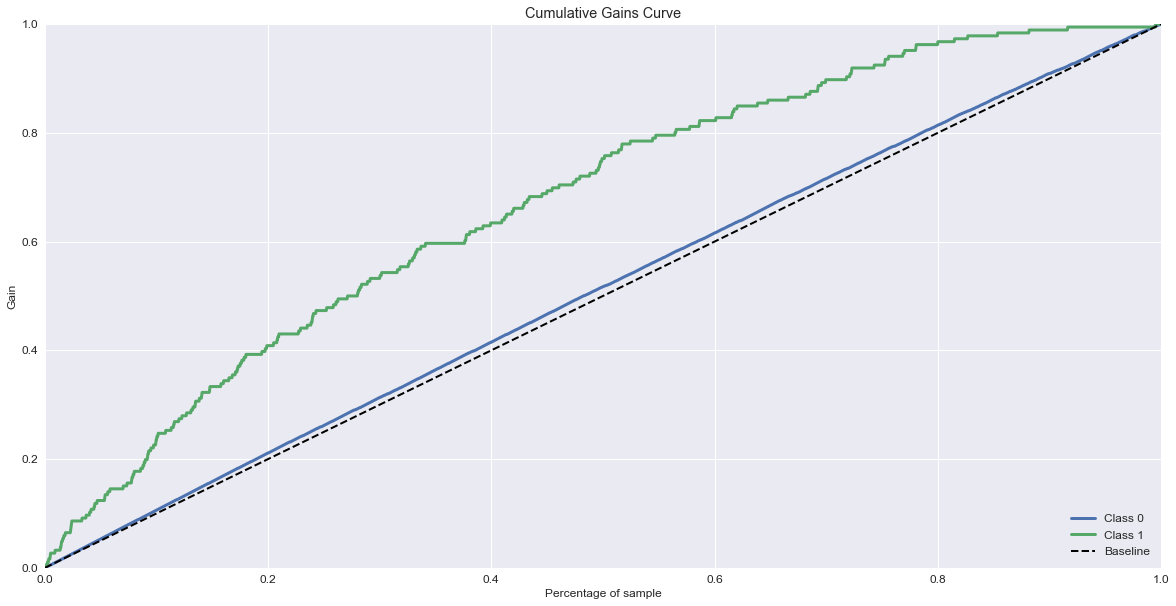

In [57]:
>>> import scikitplot as skplt
>>> lr = LogisticRegression()
>>> lr = lr.fit(X_train_selected, y_train)
>>> y_probas = lr.predict_proba(X_test_selected)
>>> skplt.metrics.plot_cumulative_gain(y_test, y_probas)

>>> plt.show()

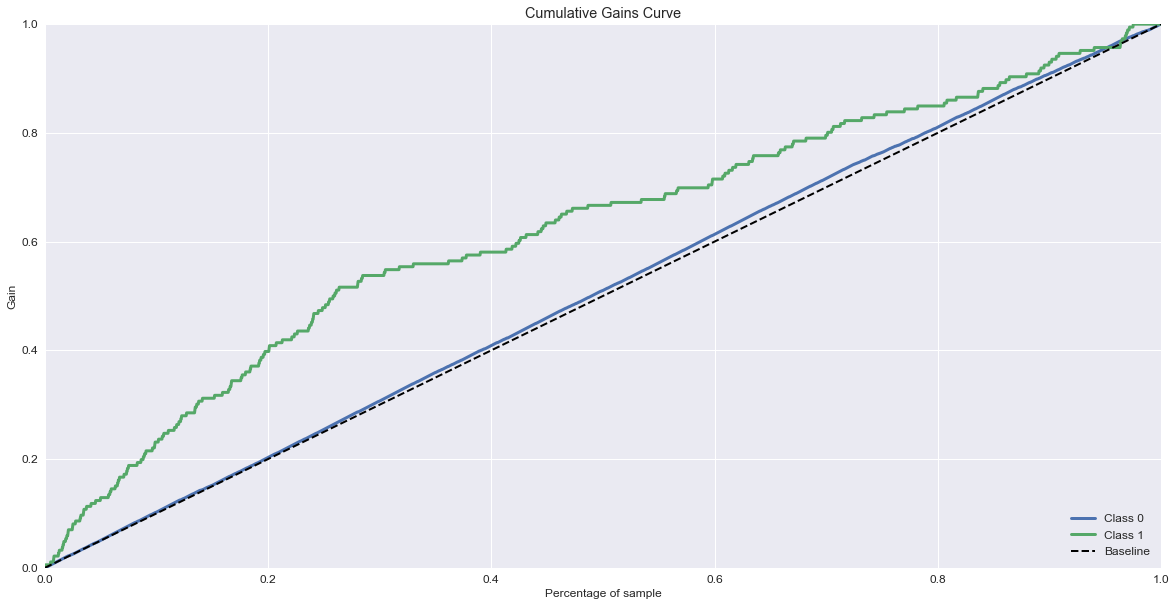

In [58]:
>>> import scikitplot as skplt
>>> lr = RandomForestClassifier()
>>> lr = lr.fit(X_train, y_train)
>>> y_probas = lr.predict_proba(X_test)
>>> skplt.metrics.plot_cumulative_gain(y_test, y_probas)

>>> plt.show()

<h3 style="color: #92B558;">  According to the cumulative  curve logistic regresion is doing a better job so our choice was on point </h3>

In [59]:
X_randomforst[(X_randomforst['Score'] > 0.6)]

0          1          2         3         4         5     Score
7397  13.095522   2.446028  -0.675308  0.204032 -6.233344  2.784090  1.000000
2852  17.544463 -11.027978   3.698105  3.030613  0.165605 -4.248537  1.000000
5481 -12.749613  -4.222557  -1.465960  2.093408 -1.932889  3.563619  1.000000
36    18.977646  -5.445649  -1.366437  2.405432 -1.725501  8.783899  1.000000
7511  21.539180 -10.298960   3.095645  3.530058 -0.303627 -4.358696  1.000000
6158  20.481104  -6.531023   0.723584  1.225914 -2.385447 -2.848326  1.000000
4030 -14.505353  -5.570704  -0.327081  1.125656 -2.749468  7.429370  1.000000
7853  13.941295   8.053063  -0.412812  4.196194  0.232490 -3.758425  1.000000
1403  13.493753  -3.785232  -1.664274  1.532752 -1.564497  8.978423  1.000000
5241  13.081234   2.479002  -0.667040  0.075716 -6.214253  2.753235  1.000000
5702  18.979656  -5.462805  -1.399368  2.479166 -1.778256  8.812807  1.000000
8057  17.450293  -4.145440  -2.795210  2.294490 -2.014798  0.250410  1.000000
8824 -14.508127  -2.258419   1.684342 -1.135067  5.193519  2.616376  1.000000
5851  20.471478  -6.491961   0.744394  1.215115 -2.483398 -2.828159  1.000000
803   13.942534   8.119136  -0.402049  4.207971  0.336302 -3.771000  1.000000
9658  17.411261  -2.731907  -3.301890  3.782153  0.523841 -0.403756  1.000000
8443  13.505783  -4.043603  -1.667269  1.834832 -2.316202  9.182859  1.000000
5296 -15.956961  -5.699670   4.020495  0.044659 -6.175096 -0.551483  1.000000
1877  13.504970  -4.042331  -1.669090  1.828578 -2.308271  9.183043  1.000000
4181  -7.910446  -8.737417   1.376553  2.253734 -2.487854  4.933849  1.000000
3883  -9.410664   1.185929   0.004708  3.011811 -1.450253  0.184533  1.000000
5032  21.525993  -9.547570   3.930289  3.344712 -0.939008 -5.474426  0.777778
5997  -7.888175  -8.449099   1.740254 -3.120730  0.722544  4.685716  0.666667
5222  16.052371   2.080250   0.021090  5.424216  3.212131  6.126751  0.666667
2714  18.310929   7.947605  -2.852043  1.074184 -3.815253 -0.586210  0.666667
263   20.367781   7.793949 -10.957570  0.710326 -5.124692 -2.055504  0.666667
6528  18.118376  -5.748720  -1.279984  2.321151 -1.510844  8.771919  0.666667
7607  13.074449   2.478195  -0.679464 -0.057594 -6.096019  2.698984  0.666667
3094  20.103482  -5.587534  -1.608572  2.434647 -1.666808  8.722622  0.666667
2896  15.413658  -1.222870   0.466407  2.660886 -1.926831  0.825726  0.666667
...         ...        ...        ...       ...       ...       ...       ...
895   20.085971  -5.449638  -1.230617 -3.103547  1.416353  8.424120  0.666667
6769  18.124473  -5.765901  -1.298544  2.522432 -1.622960  8.799348  0.666667
7561  14.266509   7.660147  -1.954264  3.139422 -1.757445 -1.332746  0.666667
5315  17.374238  -2.919230  -2.668685  2.726970 -0.460326  0.835735  0.666667
4788  -3.354047  12.353176   6.125578  1.077703 -5.239099  0.858090  0.666667
2152 -14.492909  -5.832825  -0.342095  1.576094 -3.575005  7.640376  0.666667
7227  14.260006   7.732621  -1.944979  3.071634 -1.596988 -1.381851  0.666667
2153  18.124708  -0.283641   4.407172  5.207546  1.326263 -2.441544  0.666667
4807  18.124708  -0.283641   4.407172  5.207546  1.326263 -2.441544  0.666667
3834  21.115140  -8.880408   2.518797  3.381290  0.300337 -2.906910  0.666667
3241  14.634259   8.146143  -2.291315  5.206403  2.561387  7.222509  0.666667
7957  21.545965 -10.298153   3.108069  3.663368 -0.421861 -4.304444  0.666667
1699  21.518106  -9.352461   3.934912  3.144706 -0.393068 -5.621555  0.666667
910   -8.729835  -3.549318  -0.491411  3.177609 -1.329778  0.900190  0.666667
1721  14.384218  -6.981365   1.633452  1.950523 -3.256654 -2.916068  0.666667
3170  -9.270770  -4.735405  -4.006905  0.151620 -2.671179  2.523259  0.666667
5844  18.310929   7.947605  -2.852043  1.074184 -3.815253 -0.586210  0.666667
811   24.122793  -8.735205   3.671464  2.888528 -2.090353 -4.107201  0.666667
2147  20.103482  -5.587534  -1.608572  2.434647 -1.666808  8.722622  0.666667
1741  -9.293712  -4.415114  -5.80655


<h4>After a datavisualtion and comparing of the  coloms we did extract the typical profil of a custom who are willing to applay for this type of insurance which is : </h4>

For good marketing we suggest to the ansurance to focus on the client whom age between 30-50 , have at least one house ,have fammily with grownups , with medium level of education and have at least one car policy also renters are more likly to keen on the caravans assurance 

each client have a large number of coloms that describe him that make applaying a model very hard so we did performe a dimontionality redaction using __Kbest and PCA __ which gave us  6 component in order to determen who to focus on on our marketing strategy we did select only the client that have more than __50 % __  chance of accpeting our policy  which gve us  a specific number of client less then our entire set of client thus we gain in marketing money and dont spam our clients 